In [4]:
import pandas as pd

In [14]:
image_dir = "./clothes_data"

In [32]:
import pickle

# Load the model using pickle
with open("./models/random_forest_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Or with joblib
from joblib import load

loaded_model = load("./models/random_forest_model.joblib")

In [30]:
# change to output of classifiers
csv_file = "./processed.csv"
df = pd.read_csv(csv_file)
df = df.loc[:, ~df.columns.str.contains("^Unnamed")]
# df = df.drop("照片 Picture", axis=1)  # Features
df = pd.get_dummies(df, columns=["品牌 Brand"])
df = pd.get_dummies(df, columns=["衣服長度 Clothes Length"])
df = df.sample(n=10)
print(df)

           照片 Picture  價格 Price  洋裝 Dress  網紗 Mesh  休閒褲/裙 casual pants/skirt  \
132   image_00132.jpg       499       0.0      0.0                       0.0   
1188  image_01188.jpg       599       0.0      0.0                       0.0   
1315  image_01315.jpg      5680       0.0      0.0                       1.0   
1310  image_01310.jpg      1980       0.0      0.0                       0.0   
554   image_00554.jpg       299       0.0      0.0                       0.0   
808   image_00808.jpg       690       0.0      0.0                       0.0   
721   image_00721.jpg       599       0.0      0.0                       0.0   
616   image_00616.jpg       490       0.0      0.0                       0.0   
1015  image_01015.jpg      1499       0.0      0.0                       0.0   
1006  image_01006.jpg       648       0.0      0.0                       0.0   

      牛仔褲/裙 jeans / demi skirt  工裝褲/裙 cargo pants/skirt  毛衣、針/織衣 Sweater  \
132                        0.0             

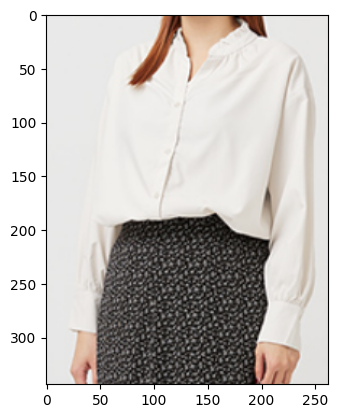

Prediction: 452.7487939389592 Actual: 499
picture is downloading
Prediction: 2119.224296841877 Actual: 599
picture is downloading
Prediction: 5878.357561762282 Actual: 5680
picture is downloading
Prediction: 2214.226891282046 Actual: 1980


C:\Users\doo12\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\doo12\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\doo12\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\doo12\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base

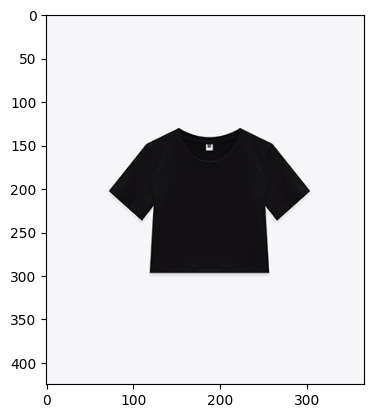

Prediction: 352.01685974478534 Actual: 299
picture is downloading
Prediction: 889.6108333333336 Actual: 690
picture is downloading
Prediction: 549.904055075901 Actual: 599


C:\Users\doo12\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\doo12\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\doo12\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


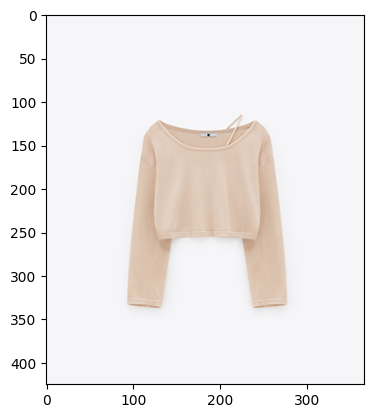

Prediction: 531.6838849180891 Actual: 490
picture is downloading
Prediction: 1776.5838910272735 Actual: 1499
picture is downloading
Prediction: 1577.7555291652793 Actual: 648


C:\Users\doo12\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\doo12\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\doo12\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import os

for index, row in df.iterrows():
    try:
        # Load and display the image
        image_path = os.path.join(image_dir, row["照片 Picture"])
        image = img.imread(image_path)
        plt.imshow(image)
        plt.show()

    except Exception as e:
        print("image", index, "is downloading")
    # Prepare the row for prediction (drop target column and reshape)
    features = row.drop(["照片 Picture", "價格 Price"]).values.reshape(1, -1)

    # Make a prediction
    pred = loaded_model.predict(features)

    # Get the actual answer for this row
    ans = row["價格 Price"]

    print("Prediction:", pred[0], "Actual:", ans)